<a href="https://colab.research.google.com/github/trongthuan205/DS102.K21/blob/master/07_DecisionTree_Iris_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0 . Import library

In [0]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree

# 1 . Load data

In [0]:
iris_data = load_iris()

In [0]:
data = pd.DataFrame(data = np.c_[iris_data['data'], iris_data['target']],
                     columns= iris_data['feature_names'] + ['target'])

In [17]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [32]:
X = np.array(data.iloc[:,0:-1].values)
X.shape

(150, 4)

In [31]:
y = np.array(data.iloc[:,-1].values).reshape(-1,1)
y.shape

(150, 1)

# 2 . Split data

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

In [34]:
X_train.shape

(120, 4)

In [35]:
y_train.shape

(120, 1)

In [36]:
X_test.shape

(30, 4)

In [37]:
y_test.shape

(30, 1)

# 3 . Visualize data

In [0]:
X1_train = X_train[:,0]
X2_train = X_train[:,1]
X3_train = X_train[:,2]
X4_train = X_train[:,3]

In [0]:
X1_test = X_test[:,0]
X2_test = X_test[:,1]
X3_test = X_test[:,2]
X4_test = X_test[:,3]

In [0]:
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.figure(figsize = (20,15))
plt.subplot(2,2,1)
plt.scatter(X1_train, X2_train, c = y_train)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel('Sepal Lenght (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal in Train data')
plt.subplot(2,2,2)
plt.scatter(X2_train, X3_train, c = y_train)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel('Petal Lenght (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal in Train data')
plt.subplot(2,2,3)
plt.scatter(X1_test, X2_test, c = y_test)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel('Sepal Lenght (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal in Test data')
plt.subplot(2,2,4)
plt.scatter(X2_test, X3_test, c = y_test)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel('Petal Lenght (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal in Test data')

# 4 . Normalize data

In [0]:
SC = StandardScaler()

In [0]:
X_train = SC.fit_transform(X_train)

In [0]:
X_test = SC.fit_transform(X_test)

# 5 . Build and Train model

In [0]:
model = DecisionTreeClassifier(criterion = 'gini', random_state = 0)

In [43]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [125]:
y_pred_train = model.predict(X_train)
y_pred_train.shape

(120,)

In [126]:
y_pred_test = model.predict(X_test)
y_pred_test.shape

(30,)

# 6 . Compare

In [0]:
def compare(i_example):
    X = X_test[i_example:i_example + 1]
    y = y_test[i_example]
    y_pred = model.predict(X)
    X_inv = SC.inverse_transform(X)
    print(X_inv, y, y_pred)

In [130]:
for i in range(7, 12):
    compare(i)

[[6.7 3.1 4.7 1.5]] [1.] [1.]
[[6.8 2.8 4.8 1.4]] [1.] [1.]
[[6.1 2.8 4.  1.3]] [1.] [1.]
[[6.1 2.6 5.6 1.4]] [2.] [2.]
[[6.4 3.2 4.5 1.5]] [1.] [2.]


# 7 . Evaluate

Accuracy score in Train data:  1.0


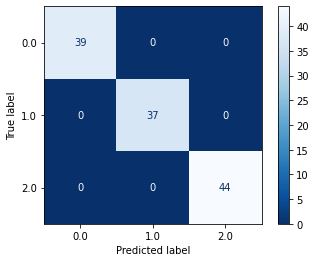

In [132]:
print('Accuracy score in Train data: ', model.score(X_train, y_train))
plot_confusion_matrix(model, X_train, y_train, cmap = 'Blues_r')

Accuracy score in Test data:  0.8666666666666667


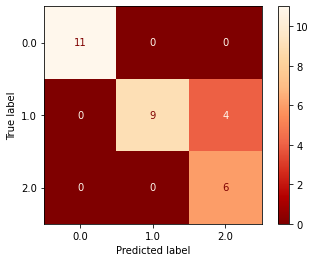

In [139]:
print('Accuracy score in Test data: ', model.score(X_test, y_test))
plot_confusion_matrix(model, X_test, y_test, cmap = 'OrRd_r')

# 7 . Visualize decission tree

Text(0.5, 1.0, 'Iris Decision Tree')

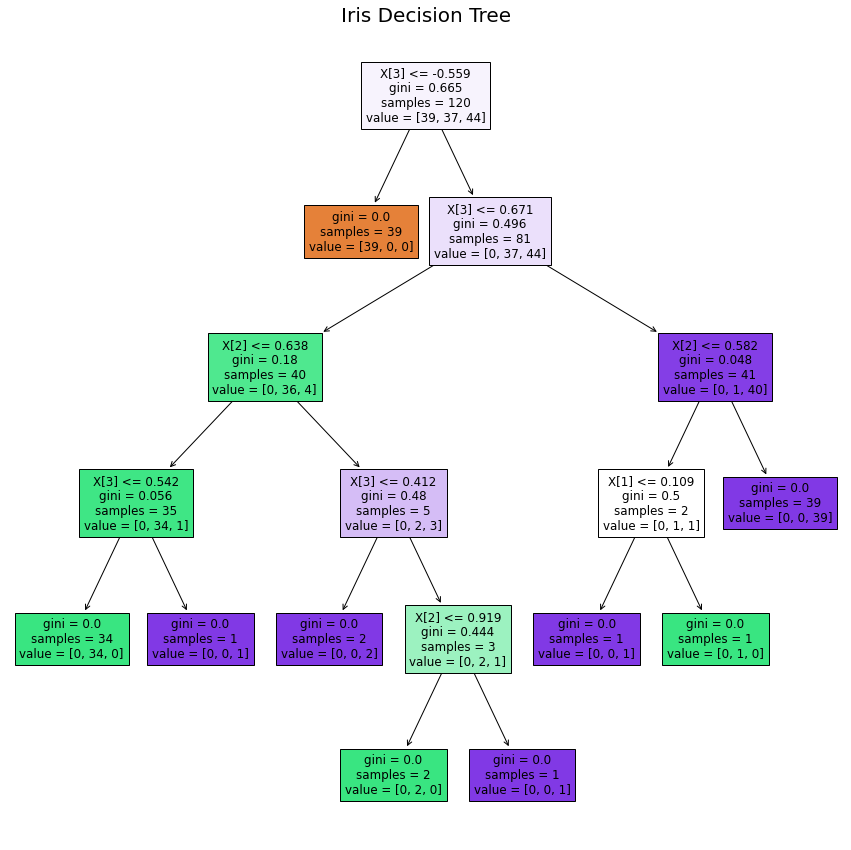

In [154]:
plt.figure(figsize = (15,15))
tree.plot_tree(model, filled = True)
plt.title('Iris Decision Tree', fontsize = 20)